# Лабораторная работа №5. Изучение моделей классификации и регрессии.

In [171]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.datasets import load_diabetes, load_linnerud

Text(0, 0.5, 'Целевая переменная')

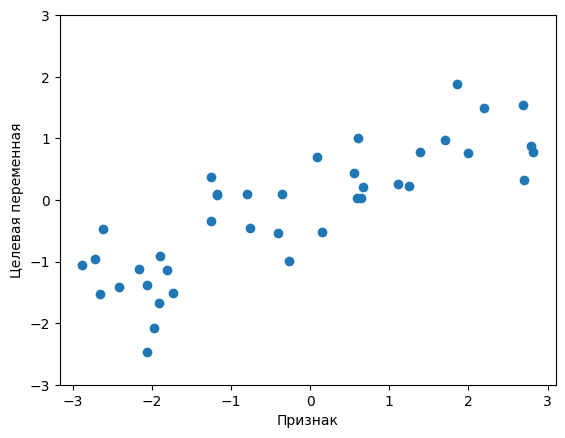

In [172]:
X, y =  mglearn.datasets.make_wave(n_samples= 40 )
plt.plot (X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Признак')
plt.ylabel('Целевая переменная')


## Изучим данные diabetes и linnerud

In [173]:
diabetes = load_diabetes()
linnerud = load_linnerud()
print("Ключи diabetes(): \n{}".format(diabetes.keys()))
print("Ключи linnerud(): \n{}".format(linnerud.keys()))

Ключи diabetes(): 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
Ключи linnerud(): 
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [174]:
print(" Форма массива data для набора diabetes: {}".format(diabetes.data.shape))
print(" Форма массива data для набора linnerud: {}".format(linnerud.data.shape))

 Форма массива data для набора diabetes: (442, 10)
 Форма массива data для набора linnerud: (20, 3)


In [175]:
print("Имена признаков diabetes: \n{}".format(diabetes.feature_names))
print("Имена признаков linnerud: \n{}".format(linnerud.feature_names))

Имена признаков diabetes: 
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Имена признаков linnerud: 
['Chins', 'Situps', 'Jumps']


Форма массива Х: (26, 2)


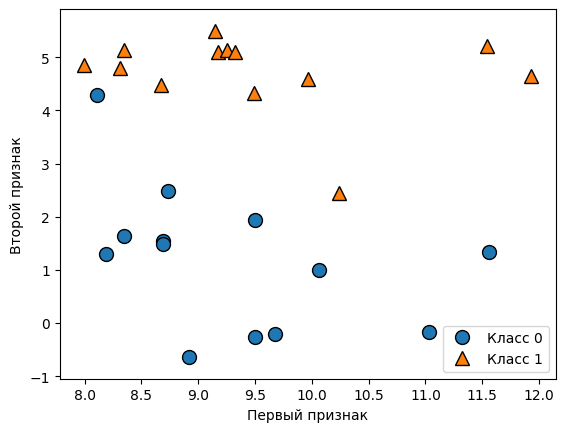

In [176]:
X, y = mglearn.datasets.make_forge()
%matplotlib inline
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Класс 0", "Класс 1"], loc = 4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("Форма массива Х: {}".format(X.shape))

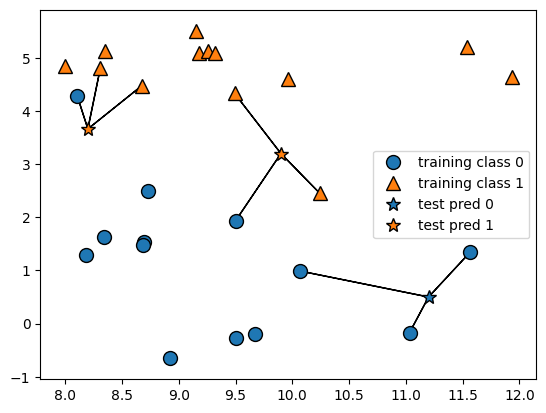

In [177]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [179]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [180]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Построим модели регрессии (KNeighborsRegressor, LinearRegression, Ridge, Lasso, LogisticRegression) для полученных датасетов, описанные в Ходе работы. Настроим наилучшие параметры моделей. И сравним результаты.


# Для diabetes

In [181]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

X, y = diabetes.data, diabetes.target

models = {
    "KNeighborsRegressor": KNeighborsRegressor(),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

# Определим сетки гиперпараметров для настройки
param_grids = {
    "KNeighborsRegressor": {"n_neighbors": [3, 5, 7]},
    "Ridge": {"alpha": [0.1, 1, 10]},
    "Lasso": {"alpha": [0.1, 1, 10]}
}

print("Diabetes")
# Переберём модели, настроем гиперпараметры и оценим их
for model_name, model in models.items():
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5)
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} - Средний квадрат ошибки: {mse:.2f}")

Diabetes
KNeighborsRegressor - Средний квадрат ошибки: 0.19
LinearRegression - Средний квадрат ошибки: 0.11
Ridge - Средний квадрат ошибки: 0.11
Lasso - Средний квадрат ошибки: 0.12


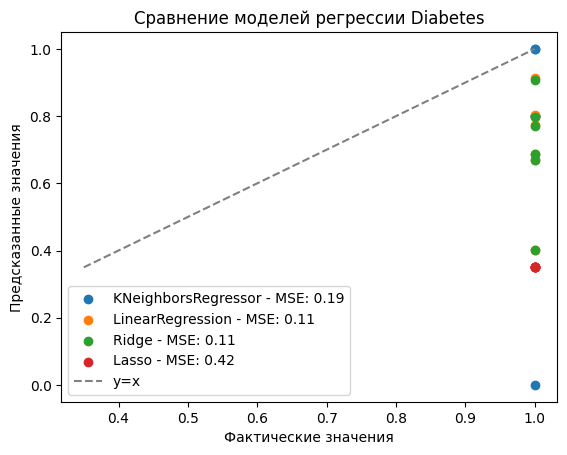

In [182]:
plt.title("Сравнение моделей регрессии Diabetes")


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    plt.scatter(y_test, y_pred, label=f"{model_name} - MSE: {mse:.2f}")


min_val = np.min([y_test, y_pred])
max_val = np.max([y_test, y_pred])

plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='gray', label='y=x')
plt.legend()

plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")

plt.show()


# Для Linnerud

In [183]:
X, y = linnerud.data, linnerud.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

models = {
    "KNeighborsRegressor": KNeighborsRegressor(),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

# Определим сетки гиперпараметров для настройки
param_grids = {
    "KNeighborsRegressor": {"n_neighbors": [3, 5, 7]},
    "Ridge": {"alpha": [0.1, 1, 10]},
    "Lasso": {"alpha": [0.1, 1, 10]}
}

print("Linnerud")

# Переберём модели, настроем гиперпараметры и оценим их
for model_name, model in models.items():
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5)
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} - Средний квадрат ошибки: {mse:.2f}")

Linnerud
KNeighborsRegressor - Средний квадрат ошибки: 161.01
LinearRegression - Средний квадрат ошибки: 239.15
Ridge - Средний квадрат ошибки: 236.96
Lasso - Средний квадрат ошибки: 198.97


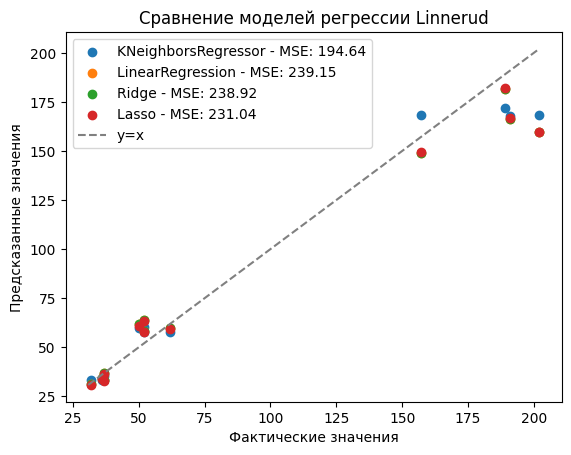

In [184]:
plt.title("Сравнение моделей регрессии Linnerud")

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    plt.scatter(y_test, y_pred, label=f"{model_name} - MSE: {mse:.2f}")

min_val = np.min([y_test, y_pred])
max_val = np.max([y_test, y_pred])

plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='gray', label='y=x')
plt.legend()

plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")

plt.show()
